# Das Augendiagramm

Systemmodell: BPSK Quelle -> RRC Pulsformung -> Bandbegrenzter Kanal -> Matched Filter -> Augendiagramm

In [13]:
%matplotlib inline

import random
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

import rrc

N = 1024  # number of symbols
M = 32    # samples per symbol (oversampling factor)
K = 64    # length of impulse response in symbols
rolloff = 1  # RRC Rolloff factor
W = 2  # Channel bandwidth as multiple of 1/T

sym = [random.choice([-1, 1]) for i in range(N)]  # BPSK symbols
sym_up = np.zeros((M*N))
sym_up[::M] = sym  # upsampled symbols

## Pulsformungsfilter (Root Raised Cosine)

[]

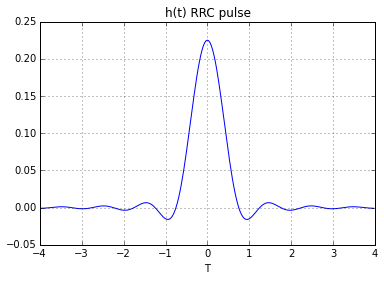

In [14]:
N_rrc = M*K+1
RRC_group_delay = int((N_rrc-1)/2)
g = rrc.get_rrc_ir(N_rrc, M, 1, rolloff)
g /= np.sqrt(np.sum(g**2))

st = np.convolve(sym_up, g, mode='full')  # TX signal

Kplot = min(K//2, 4)
plt.plot(np.arange(-Kplot, Kplot, 1/M), g[len(g)//2-Kplot*M: len(g)//2+Kplot*M]); 
plt.title("h(t) RRC pulse"); plt.xlabel('T'); plt.grid(); plt.plot()

## Kanalfilter (Tiefpass)

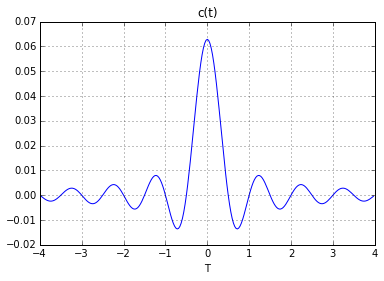

In [15]:
N_c = M*64+1
channel_group_delay = int((N_c-1)/2)
c = sig.firwin(numtaps=N_c, cutoff=1/M*W, width=0.01, nyq=1.0, pass_zero=True)
E_c = np.sum(c**2)
c /= np.sqrt(E_c)*np.sqrt(M/W)

Kplot = 4
plt.plot(np.arange(-Kplot, Kplot, 1/M), c[N_c//2-Kplot*M: N_c//2+Kplot*M]); 
plt.title("c(t)"); plt.xlabel('T'); plt.grid(); plt.show()

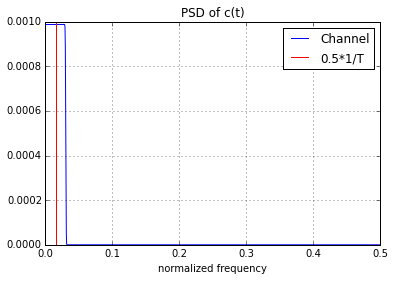

In [16]:
f, C = sig.periodogram(c, return_onesided=True)
plt.plot(f, C, label='Channel'); plt.title("PSD of c(t)"); plt.xlabel("normalized frequency"); plt.grid()
plt.axvline(x=1/2/M, ymin=0, ymax=1, color='r', label='0.5*1/T'); plt.legend()
plt.show()

## Bildung Empfangssignal

In [17]:
rt = np.convolve(st, c, mode='full')
h = g  # matched filter is equal to the pulse shaping filter due to symmetry
yt = np.convolve(rt, h)

## Augendiagramm

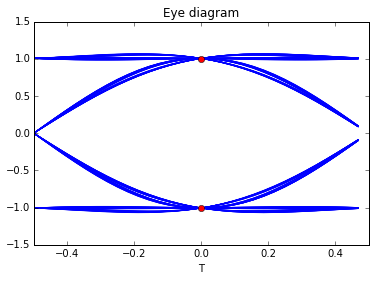

In [18]:
start = 2*RRC_group_delay+channel_group_delay + M//2
yt = yt[start:start + 100*M]
pulses = np.reshape(yt, (M, -1), order='F')
plt.plot(np.arange(-0.5, 0.5, 1/M), pulses, 'b')
plt.plot()
plt.xlim([-0.5, 0.5])
plt.xlabel('T')
plt.title("Eye diagram")
plt.plot(0, 1, 'or'); plt.plot(0, -1, 'or')
plt.show()